In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns 
sns.set()



from sklearn.preprocessing import LabelEncoder

In [2]:
os.chdir('./data/')  
products = pd.read_csv('producto_tabla.csv', sep = ",")
clients = pd.read_csv('cliente_tabla.csv', sep = ",")
train = pd.read_csv('train.csv', sep = ",")
train.head()
columns = ['Producto_ID', 'Cliente_ID', 'Agencia_ID', 'Demanda_uni_equil']
train = train.ix[:, columns]
train.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,Producto_ID,Cliente_ID,Agencia_ID,Demanda_uni_equil
0,1212,15766,1110,3
1,1216,15766,1110,4
2,1238,15766,1110,4
3,1240,15766,1110,4
4,1242,15766,1110,3


In [5]:
print('Shape: ', str(products.shape))
products.head()
print ('# Duplicate Values: ',str(products.duplicated(keep = False).sum()))
products.head()

Shape:  (2592, 2)
# Duplicate Values:  0


,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


you will see (Product Name, Pieces, Weight, Brand) pattern

In [6]:
products['short_product_name'] = products['NombreProducto'].str.extract('^(\D*)', expand = False)
products['pieces'] = products['NombreProducto'].str.extract('(\d+)p ', expand = False).astype(float)
weights = products['NombreProducto'].str.extract('(\d+)(Kg|g)', expand = True)
products['weight'] = weights[0].astype('float') * weights[1].map({'Kg': 1000, 'g': 1})
products['brand'] = products['NombreProducto'].str.extract('^.+\s(\D+) \d+$')
products.head()

,Producto_ID,NombreProducto,short_product_name,pieces,weight,brand
0,0,NO IDENTIFICADO 0,NO IDENTIFICADO,NaN,NaN,IDENTIFICADO
1,9,Capuccino Moka 750g NES 9,Capuccino Moka,NaN,750.0,NES
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli,6.0,480.0,BIM
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro,NaN,170.0,LON
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita,4.0,45.0,TR


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
#Clean up the short_product_name feature by removing stopwords and stem words...

# run running ran - run

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("spanish")

# Remove stopwords
products['short_product_name'] = (products['short_product_name'].map(lambda x: " ".join([i for i in x.lower()
                                                            .split() if i not in stopwords.words("spanish")])))

# Remove stemwords
products['short_product_name'] = (products['short_product_name'].map(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()])))

products.head()



,Producto_ID,NombreProducto,short_product_name,pieces,weight,brand
0,0,NO IDENTIFICADO 0,identific,NaN,NaN,IDENTIFICADO
1,9,Capuccino Moka 750g NES 9,capuccin mok,NaN,750.0,NES
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,bimboll ext sajonjoli,6.0,480.0,BIM
3,53,Burritos Sincro 170g CU LON 53,burrit sincr,NaN,170.0,LON
4,72,Div Tira Mini Doradita 4p 45g TR 72,div tir mini doradit,4.0,45.0,TR


In [11]:
print( 'Shape Before Merge: ' + str(train.shape))
train = train.ix[:, columns].merge(products, on = ['Producto_ID'], how = 'left')
print ('Shape After Merge: ' + str(train.shape))
train.head()

Shape Before Merge: (74180464, 4)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


Shape After Merge: (74180464, 9)


,Producto_ID,Cliente_ID,Agencia_ID,Demanda_uni_equil,NombreProducto,short_product_name,pieces,weight,brand
0,1212,15766,1110,3,Roles Canela 2p 120g BIM 1212,rol canel,2.0,120.0,BIM
1,1216,15766,1110,4,Roles Glass 2p 135g BIM 1216,rol glass,2.0,135.0,BIM
2,1238,15766,1110,4,Panquecito Gota Choc 2p 140g BIM 1238,panquecit got choc,2.0,140.0,BIM
3,1240,15766,1110,4,Mantecadas Vainilla 4p 125g BIM 1240,mantec vainill,4.0,125.0,BIM
4,1242,15766,1110,3,Donitas Espolvoreadas 6p 105g BIM 1242,donit espolvor,6.0,105.0,BIM


# Visualization

In [13]:
columns = ['short_product_name', 'Demanda_uni_equil']
best_sellers = pd.DataFrame({'Adjusted_Sales': train.groupby(['short_product_name'])['Demanda_uni_equil'].sum()}).reset_index()
best_sellers = best_sellers.sort_values(by = ['Adjusted_Sales'], ascending = False)
print (best_sellers.head())

print ()
print ('Unique Product Ids: ' + str(len(train['Producto_ID'].unique())))
print ('Unique short product names: ' + str(len(train['short_product_name'].unique())))
print ('Top Seller as Percentage of All Sales: ' + str(100.0 * best_sellers['Adjusted_Sales'][0] / best_sellers['Adjusted_Sales'].sum()))

    short_product_name  Adjusted_Sales
367                nit        57606859
274             gansit        26133420
487              reban        26098669
385          pan blanc        21724162
621          tortillin        19591899

Unique Product Ids: 1799
Unique short product names: 687
Top Seller as Percentage of All Sales: 0.03617637963439833


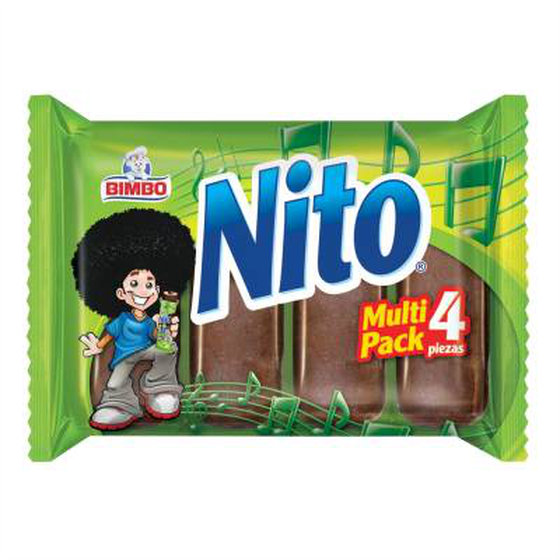

In [15]:
from IPython.display import Image
Image(filename='../nito.jpg')

In [18]:
#Let's examine the different variants of the 'nito' product...
columns = ['Producto_ID', 'short_product_name', 'pieces', 'weight', 'brand']
indices = train.ix[train['short_product_name'] == 'nit', :].duplicated(subset = ['Producto_ID', 'short_product_name'], keep = 'first')
indices = indices[indices == False]
print('Total number of Variants of NITO : ',len(indices))
train.ix[indices.index, columns]



C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Total number of Variants of NITO :  12


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


,Producto_ID,short_product_name,pieces,weight,brand
18,34053,nit,1.0,62.0,BIM
21083,1278,nit,1.0,62.0,BIM
159084,43342,nit,4.0,248.0,BIM
159375,34054,nit,1.0,62.0,BIM
1288104,630,nit,4.0,248.0,BIM
2230749,2425,nit,1.0,62.0,BIM
2338404,43206,nit,1.0,62.0,BIM
3928462,32144,nit,NaN,620.0,BIM
5484853,34055,nit,1.0,62.0,BIM
5484865,46083,nit,4.0,248.0,BIM


In [19]:
#Adding Client data to the Analysis

clients.shape



(935362, 2)

In [20]:
clients.head()

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT


In [25]:
dup_ids=clients.duplicated(subset = 'Cliente_ID'):

print '# Unique Cliente_ID: ' + str(len(clients['Cliente_ID'].unique()))
print '# Unique NombreCliente: ' + str(len(clients['NombreCliente'].unique()))


clients = clients[dup_ids == False]  
clients.shape

(930500, 2)

In [26]:

print('# Unique Cliente_ID: ' + str(len(clients['Cliente_ID'].unique())))
print('# Unique NombreCliente: ' + str(len(clients['NombreCliente'].unique())))



# Unique Cliente_ID: 930500
# Unique NombreCliente: 307009


In [27]:
client_names = pd.DataFrame({'Frequency': clients.groupby(['NombreCliente'])['NombreCliente'].count()}).reset_index()
client_names['Pct'] = 100.0 * client_names['Frequency'] / client_names['Frequency'].sum()
client_names = client_names.sort_values(by = 'Frequency', ascending = False)
client_names.head(n=30)

,NombreCliente,Frequency,Pct
227063,NO IDENTIFICADO,281670,30.270822
178995,LUPITA,4863,0.522622
203200,MARY,3016,0.324127
163963,LA PASADITA,2426,0.260720
165834,LA VENTANITA,2267,0.243632
162357,LA GUADALUPANA,1299,0.139602
265099,ROSY,1245,0.133799
20891,ALEX,1242,0.133477
120794,GABY,1238,0.133047
161465,LA ESCONDIDA,1216,0.130682


In [28]:


# Import libraries for handling text data
import re
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
stemmer = SnowballStemmer('spanish')



In [29]:


# Convert to lowercase
clients['Client_Type'] = clients['NombreCliente'].str.lower()
clients.head()



C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Cliente_ID,NombreCliente,Client_Type
0,0,SIN NOMBRE,sin nombre
1,1,OXXO XINANTECATL,oxxo xinantecatl
2,2,SIN NOMBRE,sin nombre
3,3,EL MORENO,el moreno
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT,sdn ser de alim cuerpo sa cia de int


In [30]:


# Split words in Client_Type variable
nombre_split = clients['Client_Type'].str.split()
    
# Remove empty spaces from names
nombre_no_spaces = [" ".join(x) for x in nombre_split]     
nombre_no_spaces[0:10]

# Remove non-letters and replace numbers
nombre_no_spaces = [re.sub('[^A-Za-z0-9]+', ' ', x) for x in nombre_no_spaces]   
nombre_no_spaces = [re.sub('[0-9]+', 'NUM', x) for x in nombre_no_spaces]
nombre_no_spaces[0:10]



['sin nombre',
 'oxxo xinantecatl',
 'sin nombre',
 'el moreno',
 'sdn ser de alim cuerpo sa cia de int',
 'la vaquita',
 'lupita',
 'i m el guero',
 'mini super los lupes',
 'super kompras micro colon']

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [33]:
# Stem and tokenize words 
nombre_stem = [stemmer.stem(x) for x in nombre_no_spaces]
nombre_tokenized = [word_tokenize(x) for x in nombre_stem]
nombre_tokenized[0:10]

[['sin', 'nombr'],
 ['oxxo', 'xinantecatl'],
 ['sin', 'nombr'],
 ['el', 'moren'],
 ['sdn', 'ser', 'de', 'alim', 'cuerpo', 'sa', 'cia', 'de', 'int'],
 ['la', 'vaquit'],
 ['lupit'],
 ['i', 'm', 'el', 'guer'],
 ['mini', 'super', 'los', 'lup'],
 ['super', 'kompras', 'micro', 'colon']]

In [34]:
# Remove stop words
nombre_tokenized = [word_tokenize(x) for x in clients.ix[:, 'Client_Type']]
stops = set(stopwords.words("spanish"))
nombre_cleaned = [[w for w in i if not w in stops] for i in nombre_tokenized] 
nombre_cleaned = [" ".join(x) for x in nombre_cleaned]  
nombre_cleaned[0:10]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


['nombre',
 'oxxo xinantecatl',
 'nombre',
 'moreno',
 'sdn ser alim cuerpo sa cia int',
 'vaquita',
 'lupita',
 'i m guero',
 'mini super lupes',
 'super kompras micro colon']

In [39]:
nombre_cleaned[0:30]

['nombre',
 'oxxo xinantecatl',
 'nombre',
 'moreno',
 'sdn ser alim cuerpo sa cia int',
 'vaquita',
 'lupita',
 'i m guero',
 'mini super lupes',
 'super kompras micro colon',
 'lonja mercantil',
 'farmacia nicolas san juan',
 'papeleria catala',
 'elena',
 'casa trino',
 'fma035947 bimbo sa cv',
 'joys',
 'marco',
 'lupes ii',
 'tiendita',
 'fma026712 tecnoautomotriz atlacomulco s',
 'abarrotes ivan',
 'garnica',
 'fma026709 bucirus bladas mexico sa',
 'fma026248 proveedora norte',
 'carrosita',
 'bodega comercial mexicana toluca',
 'marquez',
 'fma033097 automotriz mexicana s c',
 'jose aguilar catalan']

In [40]:
#check for grouping 
words = ['oxxo', 'super']
for word in words: 
    print(word + ' : ')
    nombre_contains = [(word in x) for x in nombre_cleaned]  
    indices = [n for n, x in enumerate(nombre_contains) if x == True]  
    temp = [nombre_cleaned[i] for i in indices]
    print (temp[0:20])
    print('# Names Appears: ' + str(len(indices)))
    print ()

oxxo : 
['oxxo xinantecatl', 'oxxo san carlos', 'oxxo mora', 'oxxo 5 mayo', 'oxxo san sebastian', 'oxxo san javier', 'oxxo carranza', 'oxxo padre mier', 'amoxxo bernardo reyes', 'oxxo tapia', 'oxxo madero terminal', 'oxxo cintermex', 'oxxo pino suarez ii', 'oxxo ruperto martinez', 'oxxo regina', 'oxxo satelite', 'oxxo mederos', 'oxxo condominio', 'oxxo estanzuela 1', 'oxxo prado']
# Names Appears: 9276

super : 
['mini super lupes', 'super kompras micro colon', 'super kompras pino suarez', 'super kompras san buenaventura', 'super kompras asuncion', 'super mundo', 'super ada', 'escuela superior comercio', 'super kompras tollocan', 'super estevez', 'minisuper carmona', 'super kompras micro santa barbara', 'super abarrotes', 'minisuper independencia', 'mini super nunez', 'mini super bueno', 'super mercado hormadi sa cv', 'super 10', 'super f', 'super centro']
# Names Appears: 16736



#let start the grouping now in 

    Individual,
    Oxxo Store
    Small Franchise
    Supermarket
    Hospital/Pharmacy
    Eatery
    Bimbo Store
    General Market/Mart
    Hotel
    School
    Walmart
    Govt Store
    Post
    Fresh Market
    Consignment
    NO IDENTIFICADO


In [42]:
def create_client_features(clients):
    
    # Remove duplicate ids
    dup_ids=clients.duplicated(subset = 'Cliente_ID')
    clients = clients[dup_ids == False]  
    
    # Create new feature
    clients = clients.copy()
    clients['Client_Type'] = clients.ix[:, 'NombreCliente']    
    
    # Convert to all UPPER-CASE
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].str.upper()
    
    # Known Large Company / Special Group Types
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].str.replace('.*REMISION.*','Consignment')
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].replace(['.*WAL MART.*','.*SAMS CLUB.*'],'Walmart', regex=True)
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].str.replace('.*OXXO.*','Oxxo Store')
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].str.replace('.*CONASUPO.*','Govt Store')
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].str.replace('.*BIMBO.*','Bimbo Store')
    
    # Term search for assortment of words picked from looking at their frequencies
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].replace(['.*COLEG.*','.*UNIV.*','.*ESCU.*','.*INSTI.*',\
                                                        '.*PREPAR.*'],'School', regex=True)
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].str.replace('.*PUESTO.*','Post')
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].replace(['.*FARMA.*','.*HOSPITAL.*','.*CLINI.*'],'Hospital/Pharmacy', regex=True)
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].replace(['.*CAFE.*','.*CREMERIA.*','.*DULCERIA.*',\
                                                        '.*REST.*','.*BURGER.*','.*TACO.*', '.*TORTA.*',\
                                                        '.*TAQUER.*','.*HOT DOG.*',\
                                                        '.*COMEDOR.*', '.*ERIA.*','.*BURGU.*'],'Eatery', regex=True)
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].str.replace('.*SUPER.*','Supermarket')
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].replace(['.*COMERCIAL.*','.*BODEGA.*','.*DEPOSITO.*',\
                                                            '.*ABARROTES.*','.*MERCADO.*','.*CAMBIO.*',\
                                                        '.*MARKET.*','.*MART .*','.*MINI .*',\
                                                        '.*PLAZA.*','.*MISC.*','.*ELEVEN.*','.*EXP.*',\
                                                         '.*SNACK.*', '.*PAPELERIA.*', '.*CARNICERIA.*',\
                                                         '.*LOCAL.*','.*COMODIN.*','.*PROVIDENCIA.*'
                                                        ],'General Market/Mart'\
                                                       , regex=True)                                                   
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].replace(['.*VERDU.*','.*FRUT.*'],'Fresh Market', regex=True)
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].replace(['.*HOTEL.*','.*MOTEL.*'],'Hotel', regex=True)    
 
    # Filter participles
    clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].replace([
            '.*LA .*','.*EL .*','.*DE .*','.*LOS .*','.*DEL .*','.*Y .*', '.*SAN .*', '.*SANTA .*',\
            '.*AG .*','.*LAS .*','.*MI .*','.*MA .*', '.*II.*', '.*[0-9]+.*'\
                ],'Small Franchise', regex=True)
               
    # Everything else bucketed into 'Individual'
    def filter_remaining(clients):
        def function_word(data):
            # Avoid the single-words created so far by checking for upper-case
            if (data.isupper()) and (data != "NO IDENTIFICADO"): 
                return 'Individual'
            else:
                return data
        clients.ix[:, 'Client_Type'] = clients.ix[:, 'Client_Type'].map(function_word)
    filter_remaining(clients)
    
    # Return data
    return clients

In [43]:
clients = create_client_features(clients)
clients.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\User

,Cliente_ID,NombreCliente,Client_Type
0,0,SIN NOMBRE,Individual
1,1,OXXO XINANTECATL,Oxxo Store
2,2,SIN NOMBRE,Individual
3,3,EL MORENO,Small Franchise
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT,Small Franchise


In [44]:
clients.head(20)

,Cliente_ID,NombreCliente,Client_Type
0,0,SIN NOMBRE,Individual
1,1,OXXO XINANTECATL,Oxxo Store
2,2,SIN NOMBRE,Individual
3,3,EL MORENO,Small Franchise
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT,Small Franchise
6,5,LA VAQUITA,Small Franchise
7,6,LUPITA,Individual
8,7,I M EL GUERO,Small Franchise
9,8,MINI SUPER LOS LUPES,Supermarket
10,9,SUPER KOMPRAS MICRO COLON,Supermarket


In [45]:
print ('# Unique Client_Type: ' + str(len(clients['Client_Type'].unique())))
common_client_types = pd.DataFrame({'Frequency': clients.groupby(['Client_Type'])['Client_Type'].count()}).reset_index()
common_client_types['Pct'] = 100.0 * common_client_types['Frequency'] / common_client_types['Frequency'].sum()
common_client_types = common_client_types.sort_values(by = 'Frequency', ascending = False)
common_client_types

# Unique Client_Type: 16


,Client_Type,Frequency,Pct
8,Individual,351908,37.819237
9,NO IDENTIFICADO,281670,30.270822
13,Small Franchise,158357,17.018485
4,General Market/Mart,65516,7.040946
2,Eatery,30277,3.253842
14,Supermarket,15911,1.709941
10,Oxxo Store,9276,0.996883
6,Hospital/Pharmacy,5693,0.611822
12,School,5562,0.597743
11,Post,2658,0.285653


In [47]:
#merge client with training data
print ('Shape Before Merge: ' + str(train.shape))
train = train.merge(clients, on = 'Cliente_ID', how = 'left')
print ('Shape After Merge: ' + str(train.shape))
train.head()

Shape Before Merge: (74180464, 9)
Shape After Merge: (74180464, 11)


,Producto_ID,Cliente_ID,Agencia_ID,Demanda_uni_equil,NombreProducto,short_product_name,pieces,weight,brand,NombreCliente,Client_Type
0,1212,15766,1110,3,Roles Canela 2p 120g BIM 1212,rol canel,2.0,120.0,BIM,PUESTO DE PERIODICOS LAZARO,Post
1,1216,15766,1110,4,Roles Glass 2p 135g BIM 1216,rol glass,2.0,135.0,BIM,PUESTO DE PERIODICOS LAZARO,Post
2,1238,15766,1110,4,Panquecito Gota Choc 2p 140g BIM 1238,panquecit got choc,2.0,140.0,BIM,PUESTO DE PERIODICOS LAZARO,Post
3,1240,15766,1110,4,Mantecadas Vainilla 4p 125g BIM 1240,mantec vainill,4.0,125.0,BIM,PUESTO DE PERIODICOS LAZARO,Post
4,1242,15766,1110,3,Donitas Espolvoreadas 6p 105g BIM 1242,donit espolvor,6.0,105.0,BIM,PUESTO DE PERIODICOS LAZARO,Post


In [48]:

best_selling_types = pd.DataFrame({'Adjusted Sales': train.groupby(['Client_Type'])['Demanda_uni_equil'].sum()}).reset_index()
best_selling_types['%'] = 100.0 * best_selling_types['Adjusted Sales'] / best_selling_types['Adjusted Sales'].sum()
best_selling_types = best_selling_types.sort_values(by = 'Adjusted Sales', ascending = False)
best_selling_types



,Client_Type,Adjusted Sales,%
8,Individual,191529780,35.738401
13,Small Franchise,100650079,18.780750
9,NO IDENTIFICADO,82784610,15.447152
4,General Market/Mart,55937875,10.437699
10,Oxxo Store,26720081,4.985820
14,Supermarket,24389983,4.551036
1,Consignment,19691066,3.674244
2,Eatery,14818703,2.765088
15,Walmart,8483857,1.583041
6,Hospital/Pharmacy,4665340,0.870527


In [51]:


import plotly.express as px

fig = px.bar(best_selling_types, x='Client_Type', y='%',
             hover_data=['%', 'Adjusted Sales'], color='Client_Type')

fig.show()

In [53]:
products['weight_per_piece'] = products['weight'] / products['pieces']
products.head()

,Producto_ID,NombreProducto,short_product_name,pieces,weight,brand,weight_per_piece
0,0,NO IDENTIFICADO 0,identific,NaN,NaN,IDENTIFICADO,NaN
1,9,Capuccino Moka 750g NES 9,capuccin mok,NaN,750.0,NES,NaN
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,bimboll ext sajonjoli,6.0,480.0,BIM,80.00
3,53,Burritos Sincro 170g CU LON 53,burrit sincr,NaN,170.0,LON,NaN
4,72,Div Tira Mini Doradita 4p 45g TR 72,div tir mini doradit,4.0,45.0,TR,11.25


In [55]:
print("Generating CSV...")
clients.to_csv("client_modified.csv", index = False, header = True)
products.to_csv("product_modified.csv", index = False, header = True)
print("Done")

Generating CSV...
Done


In [2]:
def checkMemoryUsage(data):
    print()
    print('Checking memory usage statistics for {} data... '.format(data))
    print(data.info(memory_usage=True))
    print()

In [5]:
 train_types = {
                    'Semana': np.uint8, 'Agencia_ID': np.uint16, 'Canal_ID': np.uint8
                    ,'Ruta_SAK': np.uint16, 'Cliente_ID': np.uint32, 'Producto_ID': np.uint16
                    ,'Demanda_uni_equil': np.uint16
 } 

train = pd.read_csv("./data/train.csv", sep = ",",dtype = train_types)
checkMemoryUsage(train)
test = pd.read_csv("./data/test.csv", sep = ",")
checkMemoryUsage(test)
    
clients = pd.read_csv("./data/client_modified.csv", sep = ",") 
checkMemoryUsage(clients)
products = pd.read_csv("./data/product_modified.csv", sep = ",") 
checkMemoryUsage(products)


Checking memory usage statistics for           Semana  Agencia_ID  Canal_ID  Ruta_SAK  Cliente_ID  Producto_ID  \
0              3        1110         7      3301       15766         1212   
1              3        1110         7      3301       15766         1216   
2              3        1110         7      3301       15766         1238   
3              3        1110         7      3301       15766         1240   
4              3        1110         7      3301       15766         1242   
...          ...         ...       ...       ...         ...          ...   
74180459       9       25759         1      5517     4528866        32873   
74180460       9       25759         1      5517     4528866        34226   
74180461       9       25759         1      5517     4528866        45112   
74180462       9       25759         1      5517     4547943        40217   
74180463       9       25759         1      5517     4708097        43159   

          Venta_uni_hoy  Venta_hoy  D

In [6]:
 # Merge product information
train = train.merge(products, how = 'left', on = ['Producto_ID'])

test = test.merge(products, how = 'left', on = ['Producto_ID'])

# Merge cliente information
train = train.merge(clients.ix[:, ['Cliente_ID', 'Client_Type']], how = 'left', on = ['Cliente_ID'])
checkMemoryUsage(train)
test = test.merge(clients.ix[:, ['Cliente_ID', 'Client_Type']], how = 'left', on = ['Cliente_ID']) 
checkMemoryUsage(test)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)



Checking memory usage statistics for           Semana  Agencia_ID  Canal_ID  Ruta_SAK  Cliente_ID  Producto_ID  \
0              3        1110         7      3301       15766         1212   
1              3        1110         7      3301       15766         1216   
2              3        1110         7      3301       15766         1238   
3              3        1110         7      3301       15766         1240   
4              3        1110         7      3301       15766         1242   
...          ...         ...       ...       ...         ...          ...   
74180459       9       25759         1      5517     4528866        32873   
74180460       9       25759         1      5517     4528866        34226   
74180461       9       25759         1      5517     4528866        45112   
74180462       9       25759         1      5517     4547943        40217   
74180463       9       25759         1      5517     4708097        43159   

          Venta_uni_hoy  Venta_hoy  D

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':



Checking memory usage statistics for               id  Semana  Agencia_ID  Canal_ID  Ruta_SAK  Cliente_ID  \
0              0      11        4037         1      2209     4639078   
1              1      11        2237         1      1226     4705135   
2              2      10        2045         1      2831     4549769   
3              3      11        1227         1      4448     4717855   
4              4      11        1219         1      1130      966351   
...          ...     ...         ...       ...       ...         ...   
6999246  6999246      11        2057         1      1153     4379638   
6999247  6999247      10        1334         1      2008      970421   
6999248  6999248      11        1622         1      2869      192749   
6999249  6999249      11        1636         1      4401      286071   
6999250  6999250      11        1625         1      1259      978760   

         Producto_ID                                 NombreProducto  \
0              35305      

In [7]:
def add_time_series_features(train, test):
    """ Takes train and test data as inputs. 
        Adds lagged adjusted demand variables to the data periods t-2, t-3, t-4, and t-5.
        Returns modified data. 
    """
    # Adding lagged time series variables to data Groups by (Cliente_ID, Producto_ID)
    for i in range(1, 6):
        # Add tminus to train
        columns = ['Semana', 'Cliente_ID', 'Producto_ID', 'Demanda_uni_equil']       
        train_tminus = train.ix[:, columns]
        train_tminus = train_tminus.rename(columns = {'Demanda_uni_equil': 'Demanda_uni_equil_tminus' + str(i)})
        train_tminus['Semana'] = train_tminus['Semana'] + i
        columns.remove('Demanda_uni_equil')
        train_tminus = pd.DataFrame({'Demanda_uni_equil_tminus' + str(i) : train_tminus.groupby(columns)['Demanda_uni_equil_tminus' + str(i)].mean()}).reset_index()         
        
        train = train.merge(train_tminus, how = 'left', on = ['Semana', 'Cliente_ID', 'Producto_ID'])   
        train['Demanda_uni_equil_tminus' + str(i)] = train['Demanda_uni_equil_tminus' + str(i)].astype(np.float16)
                
        # Add tminus for Semana == 10
        columns = ['Semana', 'Cliente_ID', 'Producto_ID', 'Demanda_uni_equil_tminus' + str(i)]
        test = test.merge(train_tminus.ix[train_tminus['Semana'] == 10, columns], how = 'left', on = ['Semana', 'Cliente_ID', 'Producto_ID'])
        test['Demanda_uni_equil_tminus' + str(i)] = test['Demanda_uni_equil_tminus' + str(i)].astype(np.float16)     
    
        # Add tminus for Semana == 11
        if(i != 1):
            test = test.merge(train_tminus.ix[train_tminus['Semana'] == 11, columns], how = 'left', on = ['Semana', 'Cliente_ID', 'Producto_ID']) 
            test = test.rename(columns = {'Demanda_uni_equil_tminus' + str(i) + '_x': 'Demanda_uni_equil_tminus' + str(i)})
            test.ix[test['Semana'] == 11, 'Demanda_uni_equil_tminus' + str(i)] = test.ix[test['Semana'] == 11, 'Demanda_uni_equil_tminus' + str(i) + '_y']
            test = test.drop('Demanda_uni_equil_tminus' + str(i) + '_y', axis = 1)
            test['Demanda_uni_equil_tminus' + str(i)] = test['Demanda_uni_equil_tminus' + str(i)].astype(np.float16)
        
        # Replace null values with zeros
        train.ix[train['Demanda_uni_equil_tminus' + str(i)].isnull(), 'Demanda_uni_equil_tminus' + str(i)] = 0
        test.ix[test['Demanda_uni_equil_tminus' + str(i)].isnull(), 'Demanda_uni_equil_tminus' + str(i)] = 0    
            
    return train, test

In [8]:


print (" Adding time series features...")
train, test = add_time_series_features(train, test)  
print ("Complete!")
print()
checkMemoryUsage(train)



 Adding time series features...


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-

Complete!


Checking memory usage statistics for           Semana  Agencia_ID  Canal_ID  Ruta_SAK  Cliente_ID  Producto_ID  \
0              3        1110         7      3301       15766         1212   
1              3        1110         7      3301       15766         1216   
2              3        1110         7      3301       15766         1238   
3              3        1110         7      3301       15766         1240   
4              3        1110         7      3301       15766         1242   
...          ...         ...       ...       ...         ...          ...   
74180459       9       25759         1      5517     4528866        32873   
74180460       9       25759         1      5517     4528866        34226   
74180461       9       25759         1      5517     4528866        45112   
74180462       9       25759         1      5517     4547943        40217   
74180463       9       25759         1      5517     4708097        43159   

          Venta_uni_hoy  V

In [9]:
train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,...,pieces,weight,brand,weight_per_piece,Client_Type,Demanda_uni_equil_tminus1,Demanda_uni_equil_tminus2,Demanda_uni_equil_tminus3,Demanda_uni_equil_tminus4,Demanda_uni_equil_tminus5
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,...,2.0,120.0,BIM,60.00,Post,0.0,0.0,0.0,0.0,0.0
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,...,2.0,135.0,BIM,67.50,Post,0.0,0.0,0.0,0.0,0.0
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,...,2.0,140.0,BIM,70.00,Post,0.0,0.0,0.0,0.0,0.0
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,...,4.0,125.0,BIM,31.25,Post,0.0,0.0,0.0,0.0,0.0
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,...,6.0,105.0,BIM,17.50,Post,0.0,0.0,0.0,0.0,0.0


In [10]:


def add_mean_freq_by_id(train, test):
    """ Takes train and test data as inputs. 
        Adds mean of frequencies of different id features by week (semana).
        Returns train and test data.
    """
    columns =  ['Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID', 'short_product_name', 'Client_Type'] 
    for column in columns:
        
        # Create mean of weekly id counts
        train_counts = pd.DataFrame({column + '_count' : train[[column, 'Semana']].groupby([column, 'Semana']).size()}).reset_index()
        test_counts = pd.DataFrame({column + '_count' : test[[column, 'Semana']].groupby([column, 'Semana']).size()}).reset_index()
        counts = train_counts.append(test_counts)      
        counts = pd.DataFrame({column + '_count' : counts.groupby([column])[column + '_count'].mean()}).reset_index()
        counts[column + '_count'] = counts[column + '_count'].astype(np.float32) 

        # Merge with train and test data
        train = train.merge(counts, how = 'left', on = column)    
        test = test.merge(counts, how = 'left', on = column)  
        
    return train, test



In [12]:
#print train.columns
print ("Adding id frequency variables... ")
train, test = add_mean_freq_by_id(train, test)
print ("Complete!")
print ()
checkMemoryUsage(train)

Adding id frequency variables... 
Complete!


Checking memory usage statistics for           Semana  Agencia_ID  Canal_ID  Ruta_SAK  Cliente_ID  Producto_ID  \
0              3        1110         7      3301       15766         1212   
1              3        1110         7      3301       15766         1216   
2              3        1110         7      3301       15766         1238   
3              3        1110         7      3301       15766         1240   
4              3        1110         7      3301       15766         1242   
...          ...         ...       ...       ...         ...          ...   
74180459       9       25759         1      5517     4528866        32873   
74180460       9       25759         1      5517     4528866        34226   
74180461       9       25759         1      5517     4528866        45112   
74180462       9       25759         1      5517     4547943        40217   
74180463       9       25759         1      5517     4708097        43

In [13]:
train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,...,Demanda_uni_equil_tminus3,Demanda_uni_equil_tminus4,Demanda_uni_equil_tminus5,Agencia_ID_count,Canal_ID_count,Ruta_SAK_count,Cliente_ID_count,Producto_ID_count,short_product_name_count,Client_Type_count
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,...,0.0,0.0,0.0,6726.222168,81297.335938,3480.222168,19.555555,144403.000000,245876.671875,17455.111328
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,...,0.0,0.0,0.0,6726.222168,81297.335938,3480.222168,19.555555,123046.554688,204310.000000,17455.111328
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,...,0.0,0.0,0.0,6726.222168,81297.335938,3480.222168,19.555555,143756.671875,165374.890625,17455.111328
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,...,0.0,0.0,0.0,6726.222168,81297.335938,3480.222168,19.555555,253942.781250,348308.875000,17455.111328
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,...,0.0,0.0,0.0,6726.222168,81297.335938,3480.222168,19.555555,246030.671875,293833.656250,17455.111328


In [32]:
columns = list(train.columns[train.dtypes == 'object'])
print(train[columns].isnull().sum())
train['short_product_name']=train['short_product_name'].fillna('identific')
print(train[columns].isnull().sum())

short_product_name    5811
brand                    0
Client_Type              0
dtype: int64
short_product_name    0
brand                 0
Client_Type           0
dtype: int64


In [35]:
columns = list(test.columns[test.dtypes == 'object'])
print(test[columns].isnull().sum())
test['short_product_name']=test['short_product_name'].fillna('identific')
print(test[columns].isnull().sum())

short_product_name    558
brand                   0
Client_Type             0
dtype: int64
short_product_name    0
brand                 0
Client_Type           0
dtype: int64


In [36]:


def encode_labels(train, test, threshold): 
    """ Converts categorical features to integers in train and test data.
        Groups values in categorical features appearing less than threshold into a separate category.
        Returns train and test data.
    """
    
    # Identify columns for label encoding
    columns = list(train.columns[train.dtypes == 'object'])
       
    # Return data if no columns identified   
    if(len(columns) == 0):
        return train, test
    
    
    
    print('Transforming ',columns)
    # Transform columns
    for column in columns: 
        
        # Filter data
        classes = train[column].unique()
        counts = train[column].value_counts()
        counts_classes = counts.index[counts <= threshold]
        
        # Set classes under threshold to 'identific'
        train.ix[train[column].isin(counts_classes), column] = 'identific'        
        test.ix[test[column].isin(counts_classes), column] = 'identific'          
        
        # Classes in test not in train sent to 'identific'
        test.ix[test[column].isin(classes) == False, column] = 'identific'
        
        # Perform label encoding
        le = LabelEncoder()
        le.fit(train[column].astype(str))
        train[column] = le.transform(train[column]).astype(np.uint32)
        test[column] = le.transform(test[column]).astype(np.uint32)
        
    return train, test



In [37]:
print ("Encoding labels in data...")
train, test = encode_labels(train, test, threshold = 4)
print ("Done...")

Encoding labels in data...
Transforming  ['short_product_name', 'brand', 'Client_Type']


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


Done...


In [39]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreProducto,short_product_name,pieces,weight,brand,weight_per_piece,Client_Type,Demanda_uni_equil_tminus1,Demanda_uni_equil_tminus2,Demanda_uni_equil_tminus3,Demanda_uni_equil_tminus4,Demanda_uni_equil_tminus5,Agencia_ID_count,Canal_ID_count,Ruta_SAK_count,Cliente_ID_count,Producto_ID_count,short_product_name_count,Client_Type_count
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3,1104,427,2.0,120.0,1,60.00,11,0.0,0.0,0.0,0.0,0.0,6726.222168,81297.335938,3480.222168,19.555555,144403.000000,245876.671875,17455.111328
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4,1110,428,2.0,135.0,1,67.50,11,0.0,0.0,0.0,0.0,0.0,6726.222168,81297.335938,3480.222168,19.555555,123046.554688,204310.000000,17455.111328
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4,968,372,2.0,140.0,1,70.00,11,0.0,0.0,0.0,0.0,0.0,6726.222168,81297.335938,3480.222168,19.555555,143756.671875,165374.890625,17455.111328
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4,685,280,4.0,125.0,1,31.25,11,0.0,0.0,0.0,0.0,0.0,6726.222168,81297.335938,3480.222168,19.555555,253942.781250,348308.875000,17455.111328
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3,469,184,6.0,105.0,1,17.50,11,0.0,0.0,0.0,0.0,0.0,6726.222168,81297.335938,3480.222168,19.555555,246030.671875,293833.656250,17455.111328


In [40]:
columns = [
            'Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID'
            , 'Client_Type', 'short_product_name' 
            , 'weight', 'pieces', 'weight_per_piece'
            , 'Demanda_uni_equil', 'Demanda_uni_equil_tminus1', 'Demanda_uni_equil_tminus2'
            , 'Demanda_uni_equil_tminus3', 'Demanda_uni_equil_tminus4', 'Demanda_uni_equil_tminus5'
            , 'Agencia_ID_count', 'Canal_ID_count', 'Ruta_SAK_count', 'Cliente_ID_count'
            , 'Producto_ID_count', 'Client_Type_count'
          ]

train = train.reindex(columns = columns)
columns.remove('Demanda_uni_equil')
test = test.reindex(columns = columns)

In [42]:
checkMemoryUsage(train)
train.to_csv("train_modified_for_prediction.csv", index = False, header = True)
test.to_csv("test_modified_for_prediction.csv", index = False, header = True)


Checking memory usage statistics for           Semana  Agencia_ID  Canal_ID  Ruta_SAK  Cliente_ID  Producto_ID  Client_Type  short_product_name  weight  pieces  weight_per_piece  Demanda_uni_equil  Demanda_uni_equil_tminus1  Demanda_uni_equil_tminus2  Demanda_uni_equil_tminus3  Demanda_uni_equil_tminus4  Demanda_uni_equil_tminus5  Agencia_ID_count  Canal_ID_count  Ruta_SAK_count  Cliente_ID_count  Producto_ID_count  Client_Type_count
0              3        1110         7      3301       15766         1212           11                 427   120.0     2.0         60.000000                  3                        0.0                        0.0                        0.0                        0.0                        0.0       6726.222168    8.129734e+04     3480.222168         19.555555      144403.000000       1.745511e+04
1              3        1110         7      3301       15766         1216           11                 428   135.0     2.0         67.500000                  4 

# Model Building and Evaluation

In [10]:
import xgboost as xgb

import re
import gc
from sklearn.model_selection import train_test_split
import random

In [4]:
random.seed(0)  # for reproduciblity purpose

In [5]:
def load_data(): 
    """ Loads and returns train and test data. 
    """
    
    
    # Load data efficiently by setting numpy data types for variables
    train_types = {
         'Semana': np.uint8, 'Agencia_ID': np.uint16
         , 'Canal_ID': np.uint8
         , 'Ruta_SAK': np.uint16, 'Cliente_ID': np.uint32, 'Producto_ID': np.uint16
         , 'Client_Type': np.uint32
         , 'short_product_name': np.uint32, 'weight': np.float32, 'pieces': np.float32, 'weight_per_piece': np.float32 
         , 'Demanda_uni_equil': np.float16
         , 'Demanda_uni_equil_tminus2': np.float16, 'Demanda_uni_equil_tminus3': np.float16
         , 'Demanda_uni_equil_tminus4': np.float16, 'Demanda_uni_equil_tminus5': np.float16  
         , 'Agencia_ID_count': np.float32, 'Canal_ID_count': np.float32, 'Ruta_SAK_count': np.float32
         , 'Cliente_ID_count': np.float32, 'Producto_ID_count': np.float32, 'Client_Type_count': np.float32
         }  
         
    test_types = {
         'Semana': np.uint8, 'Agencia_ID': np.uint16
         , 'Canal_ID': np.uint8
         , 'Ruta_SAK': np.uint16, 'Cliente_ID': np.uint32, 'Producto_ID': np.uint16
         , 'Client_Type': np.uint32
         , 'short_product_name': np.uint32, 'weight': np.float32, 'pieces': np.float32, 'weight_per_piece': np.float32 
         , 'Demanda_uni_equil_tminus2': np.float16, 'Demanda_uni_equil_tminus3': np.float16
         , 'Demanda_uni_equil_tminus4': np.float16, 'Demanda_uni_equil_tminus5': np.float16          
         , 'Agencia_ID_count': np.float32, 'Canal_ID_count': np.float32, 'Ruta_SAK_count': np.float32
         , 'Cliente_ID_count': np.float32, 'Producto_ID_count': np.float32, 'Client_Type_count': np.float32
         }  
    
    train = pd.read_csv("./train_modified_for_prediction.csv", sep = ",", usecols = train_types.keys(), dtype = train_types,nrows=7090232) 
    #test = pd.read_csv("./test_modified_for_prediction.csv", sep = ",", usecols = test_types.keys(), dtype = test_types) 

    return train

In [6]:
print ("Loading data...")
train = load_data() 
print("Done")
print()
checkMemoryUsage(train)

Loading data...
Done


Checking memory usage statistics for          Semana  Agencia_ID  Canal_ID  Ruta_SAK  Cliente_ID  Producto_ID  \
0             3        1110         7      3301       15766         1212   
1             3        1110         7      3301       15766         1216   
2             3        1110         7      3301       15766         1238   
3             3        1110         7      3301       15766         1240   
4             3        1110         7      3301       15766         1242   
...         ...         ...       ...       ...         ...          ...   
7090227       3        1945         1      1251      518328        41938   
7090228       3        1945         1      1251      518328        48417   
7090229       3        1945         1      1251      518328        48421   
7090230       3        1945         1      1251      518345         1146   
7090231       3        1945         1      1251      518345         1150   

         Client_Type  short

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [11]:
 # Reset data indices
train = train.reset_index(drop=True)
#test = test.reset_index(drop=True)       
      
    
# Data for model building
column_names = list(train.drop(['Demanda_uni_equil'], axis = 1).columns)

print("Splitting training data in Training and Testing...")
x_train,x_test,Y_train,Y_test = train_test_split(train.drop(labels='Demanda_uni_equil', axis = 1),train['Demanda_uni_equil'],test_size = 0.2,random_state=42)
print()
print('Training Data Size :',x_train.shape)
print('Test Data Size :',x_test.shape)
print('Training Label Size :',Y_train.shape)
print('Testing Label Size :',Y_test.shape)

Splitting training data in Training and Testing...

Training Data Size : (5672185, 21)
Test Data Size : (1418047, 21)
Training Label Size : (5672185,)
Testing Label Size : (1418047,)


In [14]:
# Remove original train data sets from memory
del train
gc.collect()

233

In [18]:
gc.collect()

1006

In [15]:
x_train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Client_Type,short_product_name,weight,pieces,weight_per_piece,Demanda_uni_equil_tminus2,Demanda_uni_equil_tminus3,Demanda_uni_equil_tminus4,Demanda_uni_equil_tminus5,Agencia_ID_count,Canal_ID_count,Ruta_SAK_count,Cliente_ID_count,Producto_ID_count,Client_Type_count
1356304,3,1153,1,1404,1168471,1240,8,280,125.0,4.0,31.25,0.0,0.0,0.0,0.0,55899.554688,8197713.0,9610.888672,37.555557,253942.781250,3848448.750
2373315,3,1236,1,1245,4351278,1240,9,280,125.0,4.0,31.25,0.0,0.0,0.0,0.0,48123.890625,8197713.0,12933.444336,5.555555,253942.781250,1616014.250
3140935,3,1332,1,2062,1976333,43274,8,309,70.0,1.0,70.00,0.0,0.0,0.0,0.0,43465.109375,8197713.0,4684.555664,17.111111,63302.890625,3848448.750
115296,3,1112,1,2103,1968175,43058,13,469,120.0,8.0,15.00,0.0,0.0,0.0,0.0,43113.332031,8197713.0,29340.554688,49.888889,97578.890625,1875493.125
2853671,3,1312,1,1016,102064,73,13,352,540.0,NaN,NaN,0.0,0.0,0.0,0.0,68911.781250,8197713.0,19024.888672,36.777779,26610.445312,1875493.125


In [16]:
print ("Create model and define parameters AND Optimize it using Grid Search..." )

from sklearn.model_selection import GridSearchCV

param ={
            'n_estimators': [100,500, 1000,1500],
            'max_depth':[2,4,6,8]
        }

xgboost_tree = xgb.XGBRegressor(
    eta = 0.1,
    min_child_weight = 2,
    subsample = 0.8,
    objective= 'reg:linear',
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)

grid = GridSearchCV(estimator=xgboost_tree,param_grid=param,cv=5,  verbose=10, n_jobs=-1,scoring='neg_mean_squared_error')
   
    

    
grid_result = grid.fit(x_train, Y_train)
best_params = grid_result.best_params_

print('Best Params :',best_params)

Create model and define parameters AND Optimize it using Grid Search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 59.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 126.9min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 241.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 364.9min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 595.8min
[Parallel(n_jobs=-1)]: Done  66 out of  80 | elapsed: 1140.3min remaining: 241.9min
[Parallel(n_jobs=-1)]: Done  75 out of  80 | elapsed: 1509.2min remaining: 100.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 1685.3min finished
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:40:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Params : {'max_depth': 8, 'n_estimators': 1500}


In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error

pred = grid_result.predict(x_test)
print('Root Mean squared error {}'.format(sqrt(mean_squared_error(Y_test, pred))))

Root Mean squared error 13.581652640682151


In [36]:
df1 = pd.concat([Y_test.reset_index(drop='True'),pd.DataFrame(pred).reset_index(drop='True')],axis=1)
df1 = pd.DataFrame(df1)


In [38]:
df1.columns = ['Orginal','Prediction']
df1['Diff'] = df1.Orginal - df1.Prediction
df1.head()

,Orginal,Prediction,Diff
0,1.0,2.292568,-1.292568
1,44.0,37.314064,6.685936
2,6.0,2.937089,3.062911
3,3.0,3.244777,-0.244777
4,4.0,3.433939,0.566061
